## Машинное обучение, ФКН ВШЭ

## Практическое задание 4

### Общая информация
Дата выдачи: 12 октября 2018

Мягкий дедлайн: 7:59MSK 20 октября 2018 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 21 октября 2018.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

** Оценка:** ...

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import matplotlib as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score
import time

## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [2]:
X, y = make_classification(n_samples=100000, n_features=20,
                                    n_informative=10, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(2 балла)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [10]:
param = {'C': [10 ** x for x in range(-5, 6)]}
svm = LinearSVC()
grid = GridSearchCV(svm, param)
grid.fit(X_train, y_train)
print(grid.cv_results_['mean_test_score'])
print(grid.best_params_)
print(grid.score(X_test, y_test))

[0.84748571 0.84922857 0.84944286 0.8495     0.8495     0.84774286
 0.80497143 0.79532857 0.76774286 0.72128571 0.79364286]
{'C': 0.01}
0.8490333333333333


In [18]:
svm = LinearSVC(C = 0.01)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_dec = svm.decision_function(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

AUC ROC = 0.925862857537628
AUC PR = 0.9247539362369965


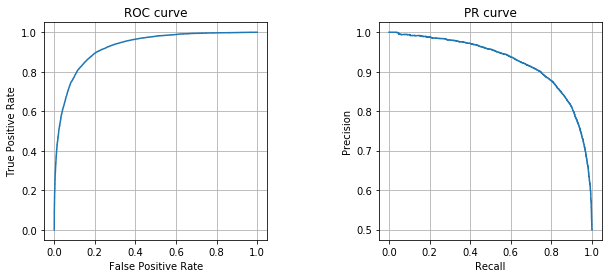

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_dec)
precision, recall, thresholds = precision_recall_curve(y_test, y_dec)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)
ax1.plot(fpr, tpr)
ax1.grid(True)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title('ROC curve')

ax2.plot(recall, precision)
ax2.grid(True)
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')
ax2.set_title('PR curve')

print('AUC ROC =', auc(fpr, tpr))
print('AUC PR =', auc(recall, precision))

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

In [74]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0)

In [77]:
param = {'C': [10 ** x for x in range(-5, 6)]}
svm = SVC(kernel='linear')
grid = GridSearchCV(svm, param)
grid.fit(X, y)
print(grid.best_params_)

{'C': 10}


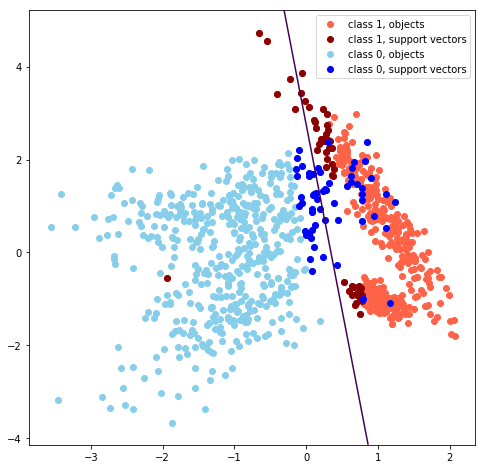

In [103]:
svm = SVC(kernel='linear', C=10)
svm.fit(X, y)
support = svm.support_

# objects visualization
mask = y == 1
plt.figure(figsize=(8, 8))
plt.scatter(X[mask][:,0], X[mask][:, 1], c='tomato', label='class 1, objects')
mask = logical_not(mask)
plt.scatter(X[mask][:, 0], X[mask][:, 1], c='skyblue', label='class 0, objects')
X_sup = X[support]
y_sup = y[support]
mask = y_sup == 1
plt.scatter(X_sup[mask][:, 0], X_sup[mask][:, 1], c='darkred', label='class 1, support vectors')
mask = logical_not(mask)
plt.scatter(X_sup[mask][:, 0], X_sup[mask][:, 1], c='blue', label='class 0, support vectors')
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

#separating hyperplane visualization
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, levels=0)

# __Задание 2.__ Калибровка вероятностей.

__(2 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [3]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)  # был неправильно поставлен знак: должна быть сумма, а не разность
        bin_real_ratios.append(np.sum(y_test[(preds >= l) & (preds < r)] == 1) /
                               np.size(y_test[(preds >= l) & (preds < r)])) # была неправильно посчитана доля единиц
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [4]:
lr = LogisticRegression()
param = {'C': [10 ** x for x in range(-5, 6)]}
grid = GridSearchCV(lr, param)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.01}


In [6]:
lr = LogisticRegression(C=0.01)
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)

svm = LinearSVC(C = 0.01)
svm.fit(X_train, y_train)
y_proba_svm = svm.decision_function(X_test)

Text(0.5,1,'calibration curve for logistic regression')

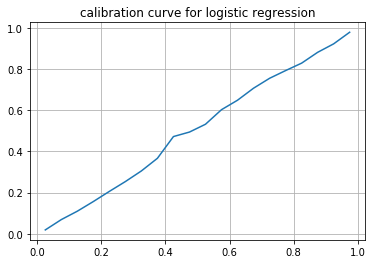

In [7]:
plot_calibration_curve(y_test, y_proba_lr[:, 1])
plt.grid(True)
plt.title('calibration curve for logistic regression')

Text(0.5,1,'calibration curve for support vector machine')

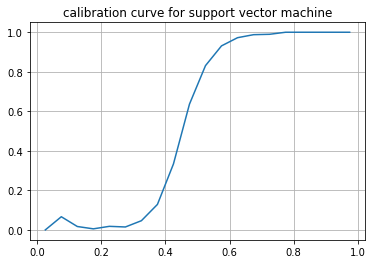

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
y_proba_svm_minmax = minmax.fit_transform(y_proba_svm[:, np.newaxis])
plot_calibration_curve(y_test, y_proba_svm_minmax[:, 0])
plt.grid(True)
plt.title('calibration curve for support vector machine')

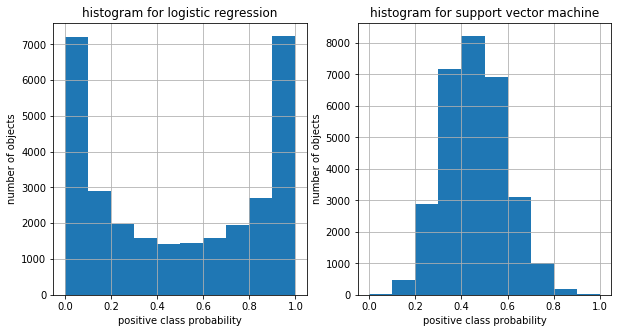

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(y_proba_lr[:, 1])
ax1.set_xlabel('positive class probability')
ax1.set_ylabel('number of objects')
ax1.set_title('histogram for logistic regression')
ax2.hist(y_proba_svm_minmax)
ax1.grid(True)
ax2.set_xlabel('positive class probability')
ax2.set_ylabel('number of objects')
ax2.set_title('histogram for support vector machine')
ax2.grid(True)

По калибровочным кривым видно, что метод логистической регрессии корректно предсказывает вероятности классов, тк кривая близка к диагональной. В то же время преобразованные функцией Minmaxscaler() к диапазону (0,1) ответы метода опорных векторов значительно занижают близкие к 0 вероятности и завышают близкие к 1.

На гистограммах видно, что логистическая регрессия больше всего объектов четко относит к положительному или отрицательному классу, остальные вероятности представлены плавно убывающим к центру гистограммы (вероятность=0.5) числом объектов. Можно предположить, что такое распределение примерно соответствует реальному распределению эмпирических вероятностей на выборке.

По результатам, полученным с помощью метода опорных векторов, больше всего объектов имеют вероятность 0.5 принадлежности положительному классу. А вероятности 1 или 0 присвоены почти нулевому числу объектов. Возможно, это связано с тем, что изначально метод вернул расстояния до опорной прямой (с разными знаками, в зависимости от того, по какую сторону от прямой лежат объекты). Больше всего объектов расположено вблизи прямой, и их концентрация снижается по мере отдаления от нее. Вероятности 0.5 как раз соответствуют объекты из центральной части получившегося диапазона.

Также, тк диапазон значений получается значительно больше, чем (0, 1), то для объектов, расположенных на периферии (то есть тех, для которых вероятность принадлежности к одному из классов близка к 1), полученное после масштабирование значение будет намного больше или меньше реальной вероятности. Это мы и видим на калибровочной кривой. А резкий скачок в окрестности 0.5 соответствует большому числу отъектов, для которых предсказанная методом вероятность равно 0.5

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [31]:
from sklearn.calibration import CalibratedClassifierCV

c_cl = CalibratedClassifierCV(svm, method='sigmoid')
c_cl.fit(X_train, y_train)
y_proba_svm_c = c_cl.predict_proba(X_test)

Text(0.5,1,'calibration curve for support vector machine')

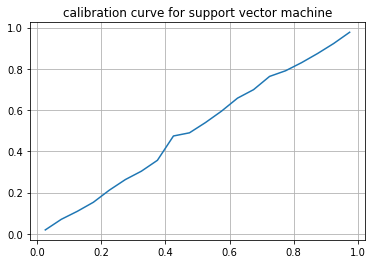

In [32]:
plot_calibration_curve(y_test, y_proba_svm_c[:, 1])
plt.grid(True)
plt.title('calibration curve for support vector machine')

Калибровочная кривая заметно улучшилась и стала близка к диагональной.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

## Часть 2. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с прошлогоднего конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [3]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [4]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

__Задание 0.__ Посчитайте качество (в этом задании будем работать ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [36]:
lr = LogisticRegression()
param = {'C': [10 ** x for x in range(-3, 3)]}
grid = GridSearchCV(lr, param, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.1}


In [19]:
start = time.time()
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
end = time.time()
print('wall time:', end - start)
y_proba = lr.predict_proba(X_test)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

wall time: 4.688273668289185
AUC ROC 0.6250644334009279


 __Задание 1.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(1 балл)__

In [28]:
names_list = X_train.columns.values.tolist()
ind_list = []
for name in names_list:
    if name.endswith('cat'):
        ind_list.append(name)

In [21]:
X_train_one_hot = X_train.copy()
X_test_one_hot = X_test.copy()

for ind in ind_list:
    one_hot_train = pd.get_dummies(X_train[ind])
    one_hot_test = pd.get_dummies(X_test[ind])
    final_train, final_test = one_hot_train.align(one_hot_test, join='left', axis=1, fill_value=0)
    X_train_one_hot = X_train_one_hot.drop(ind, axis=1)
    X_train_one_hot = pd.concat([X_train_one_hot, one_hot_train], axis=1)
    X_test_one_hot = X_test_one_hot.drop(ind, axis=1)
    X_test_one_hot = pd.concat([X_test_one_hot, one_hot_test], axis=1)

In [46]:
lr = LogisticRegression()
param = {'C': [10 ** x for x in range(-3, 3)]}
grid = GridSearchCV(lr, param, scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 0.1}


In [22]:
start = time.time()
lr = LogisticRegression(C=0.1)
lr.fit(X_train_one_hot, y_train)
stop = time.time()
print('wall time:', stop - start)
y_proba = lr.predict_proba(X_test_one_hot)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

wall time: 6.929536819458008
AUC ROC 0.6332510327188149


Время, потребовавшееся на обучение модели, значительно возросло (с 4.48 секунд до 6.93), в то время как качество улучшилось совсем незначительно (значение AUC ROC возросло с 0.6250 до 0.6333).

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 2.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(2 балла)__

In [6]:
X_train_counts = X_train.copy()
X_test_counts = X_test.copy()

for ind in ind_list:
    cat_list = np.unique(X_train[ind])
    counts_train = np.zeros(np.size(X_train[ind]))
    counts_test = np.zeros(np.size(X_test[ind]))
    for cat in cat_list:         
        cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) / np.sum(np.equal(X_train[ind], cat))
        counts_train[X_train[ind] == cat] = cat_val
        counts_test[X_test[ind] == cat] = cat_val
    X_train_counts.loc[:, ind] = counts_train
    X_test_counts.loc[:, ind] = counts_test

In [53]:
params = {'C': [10 ** x for x in range(5, 10)]}

lr = LogisticRegression()
grid = GridSearchCV(lr, params, scoring='roc_auc')
grid.fit(X_train_counts, y_train)
y_proba = grid.predict_proba(X_test_counts)
print(grid.best_params_)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

{'C': 1000000}
AUC ROC 0.6288246230550746


In [24]:
start = time.time()
lr = LogisticRegression(C=1000000)
lr.fit(X_train_counts, y_train)
stop = time.time()
print('wall time:', stop - start)
y_proba = lr.predict_proba(X_test_counts)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

wall time: 20.88016152381897
AUC ROC 0.6288246230550746


Несмотря на то, что количество признаков значительно уменьшилось, время работы метода увеличилось в несколько раз, а качество на тестовой выборке стало немного лучше, чем на исходных данных, но хуже, чем при использовании one-hot кодирования.

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 3.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(1 балл)__

__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 

__(+0.5 балла)__

In [7]:
sigma_list = [10 ** x for x in range(-5, -2)]
params = {'C': [10 ** x for x in range(5, 8)]}

              
for sigma in sigma_list:
    X_train_counts_noise = X_train_counts.copy()
    X_test_counts_noise = X_test_counts.copy()
    for ind in ind_list:
        noise_train = np.random.normal(0, sigma, np.size(X_train[ind])) * \
            -1 ** np.random.randint(0, 2, np.size(X_train[ind]))
        noise_test = np.random.normal(0, sigma, np.size(X_test[ind])) * \
            -1 ** np.random.randint(0, 2, np.size(X_test[ind]))
        X_train_counts_noise.loc[:, ind] = X_train_counts[ind] + noise_train
        X_test_counts_noise.loc[:, ind] = X_test_counts[ind] + noise_test
    lr = LogisticRegression()
    grid = GridSearchCV(lr, params, scoring='roc_auc')
    grid.fit(X_train_counts_noise, y_train)
    y_proba = grid.predict_proba(X_test_counts_noise)
    print('noise in range:', sigma)
    print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

noise in range: 1e-05
AUC ROC 0.6288246902550755
noise in range: 0.0001
AUC ROC 0.6288187174549895
noise in range: 0.001
AUC ROC 0.6288293510551426


При добавлении шума точность увеличилась, но совсем незначительно (при значении sigma=0.001). При бОльших значениях точность резко ухудшается. Далее реализован подсчет по фолдам (способ 2).

In [33]:
num_folds = 5
size = np.size(X_train[ind_list[0]]) // num_folds
X_train_counts_folds = X_train_counts.copy()
X_test_counts_folds = X_test_counts.copy()

for ind in ind_list:
    cat_list = np.unique(X_train[ind])
    counts_train = np.zeros(np.size(X_train[ind]))
    counts_test = np.zeros(np.size(X_test[ind]))
    indexes_list = np.arange(np.size(X_train[ind]))
    np.random.shuffle(ind_list)
    for fold in range(num_folds):
        beg_ind = size * fold
        end_ind = size * (fold + 1)
        train_part = np.concatenate((indexes_list[:beg_ind], indexes_list[end_ind:]))
        main_part = indexes_list[beg_ind: end_ind]
        fold_train = np.zeros(np.size(main_part))
        for cat in cat_list:
            cat_val = np.sum(np.equal(X_train.iloc[train_part][ind], cat) & y_train[train_part] == 1) /  \
                np.sum(np.equal(X_train.iloc[train_part][ind], cat))
            fold_train[X_train.iloc[main_part][ind] == cat] = cat_val
        counts_train[main_part] = fold_train
    for cat in cat_list:
        counts_test[X_test[ind] == cat] = np.sum(np.equal(X_train[ind], cat) & y_train == 1) /  \
                np.sum(np.equal(X_train[ind], cat)) 
    X_train_counts_folds.loc[:, ind] = counts_train
    X_test_counts_folds.loc[:, ind] = counts_test

In [34]:
params = {'C': [10 ** x for x in range(6, 10)]}

lr = LogisticRegression()
grid = GridSearchCV(lr, params, scoring='roc_auc')
grid.fit(X_train_counts_folds, y_train)
y_proba = grid.predict_proba(X_test_counts_folds)
print(grid.best_params_)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

{'C': 100000000}
AUC ROC 0.6290142018578045


In [35]:
X_train_counts_noise = X_train.copy()
X_test_counts_noise = X_test.copy()
for ind in ind_list:
    noise_train = np.random.normal(0, 0.001, np.size(X_train[ind])) * \
        -1 ** np.random.randint(0, 2, np.size(X_train[ind]))
    noise_test = np.random.normal(0.001, sigma, np.size(X_test[ind])) * \
        -1 ** np.random.randint(0, 2, np.size(X_test[ind]))
    X_train_counts_noise.loc[:, ind] = X_train_counts_folds[ind] + noise_train
    X_test_counts_noise.loc[:, ind] = X_test_counts_folds[ind] + noise_test
lr = LogisticRegression(C = 100000000)
lr.fit(X_train_counts_noise, y_train)
y_proba = lr.predict_proba(X_test_counts_noise)
print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

AUC ROC 0.6281680430456198


Точность при подсчете по фолдам немного улучшилась, но добавление шума повлияло негативно.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 4.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(2 балла)__

In [43]:
global_mean = np.sum(y_train) / np.size(y_train)
X_train_counts_gl = X_train_counts.copy()
X_test_counts_gl = X_test_counts.copy()
C_list = [x for x in range(5, 15)]

for C in C_list:
    for ind in ind_list:
        cat_list = np.unique(X_train[ind])
        counts_train = np.zeros(np.size(X_train[ind]))
        counts_test = np.zeros(np.size(X_test[ind]))
        for cat in cat_list:         
            cat_val = np.sum(np.equal(X_train[ind], cat) & y_train == 1) + C * global_mean / \
                np.sum(np.equal(X_train[ind], cat)) + C
            counts_train[X_train[ind] == cat] = cat_val
            counts_test[X_test[ind] == cat] = cat_val
        X_train_counts_gl.loc[:, ind] = counts_train
        X_test_counts_gl.loc[:, ind] = counts_test
    lr = LogisticRegression(C = 10000)
    lr.fit(X_train_counts_gl, y_train)
    y_proba = lr.predict_proba(X_test_counts_gl)
    print("AUC ROC", roc_auc_score(y_test, y_proba[:, 1]))

AUC ROC 0.6195277393211995
AUC ROC 0.6201666561303999
AUC ROC 0.6223129009613058
AUC ROC 0.6153554604611186
AUC ROC 0.6221684913592264
AUC ROC 0.6208572789403448
AUC ROC 0.6205230773355324
AUC ROC 0.620545693335858
AUC ROC 0.6147641968526043
AUC ROC 0.620320551332616


Не наблюдается прямой зависимости точности от значения параметра C, все полученные точности ниже точностей без применения сглаживания.

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ При использовании счетчиков количество полученных признаков значительно меньше, чем при one-hot кодировании, если в исходных данных признак имеет большое количество различных значений, а целевая переменная принимает значения из небольшого дипазона. Точность в ходе экспериментов получилась выше, чем на исходных данных, но немного ниже, чем при one-hot кодировании. Но, возможно, при более тщательной настройке переменных можно получить более высокую точность.

**Задание 5.** Какой лучший мем в 2k18?

__Ответ:__ мыш (кродеться)


**Задание 6.** Поделитесь лучшим стикерпаком. Только там не должно быть преподавателей и ассистентов этого курса.

__Ответ:__ мало пользуюсь телеграмом:(

## Часть 3 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

__Задание 1.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__
- несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ